In [2]:
pip install hmmlearn

     ------------------------------------ 124.5/124.5 kB 668.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [4]:
pip install numpy==1.21

     ---------------------------------------- 14.0/14.0 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


In [3]:
pip install librosa

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from hmmlearn import hmm

def load_audio_speech(file_path):
    signal, sample_rate = librosa.load(file_path, sr=None)
    return signal, sample_rate

def calculate_stft(signal, sample_rate):
    stft_matrix = np.abs(librosa.stft(signal))
    return stft_matrix

def train_hidden_markov_model(features, num_components=3, num_iterations=100):
    model = hmm.GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=num_iterations)
    model.fit(features)
    return model

def visualize_stft(stft_matrix, sample_rate):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft_matrix, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log', cmap='plasma') # Change the colormap here
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Visualization')
    plt.show()

def classify_audio_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

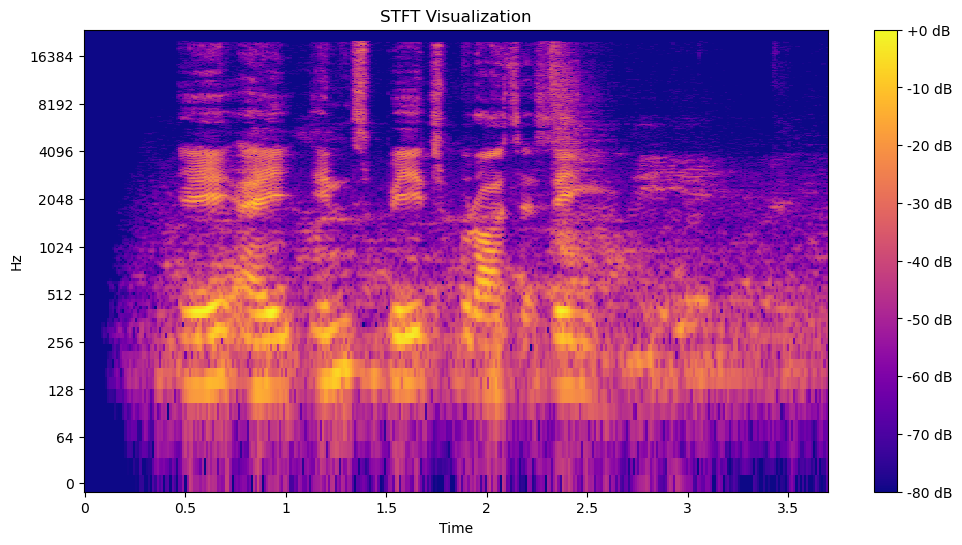

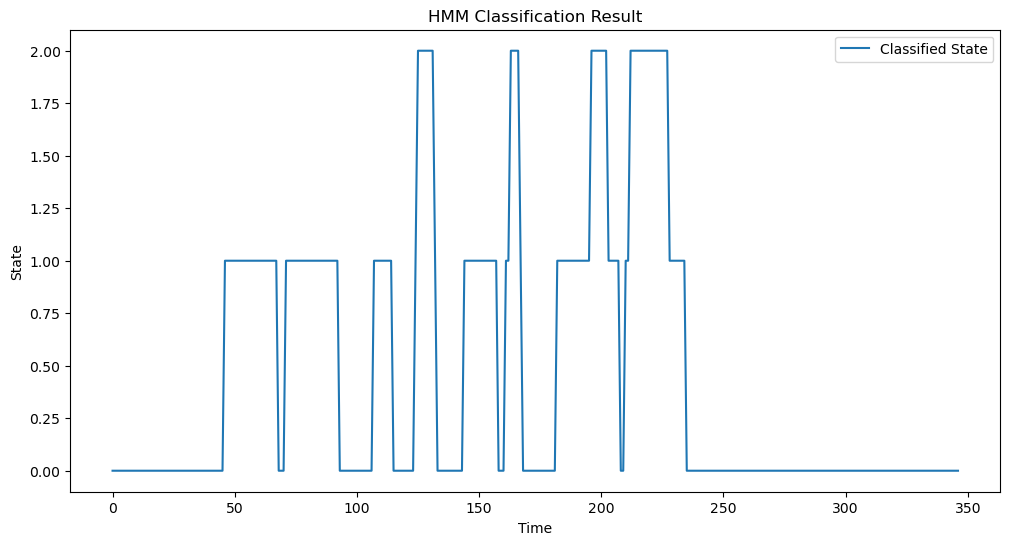

HMM Model Parameters:
Transition Matrix:
[[0.96244131 0.03755869 0.        ]
 [0.08080808 0.87878788 0.04040404]
 [0.         0.11764706 0.88235294]]
Means:
[[3.35957137e-02 3.42582062e-02 5.73119618e-02 ... 2.49362156e-06
  2.57334250e-06 2.56348801e-06]
 [8.98904598e-02 1.11016362e-01 1.42656939e-01 ... 2.21815966e-06
  2.61439215e-06 2.26081783e-06]
 [5.90936443e-02 8.07921525e-02 7.44929708e-02 ... 2.24611583e-06
  2.24580951e-06 1.79848640e-06]]
Covariances:
[[[2.14686303e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.48360777e-03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.59261338e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67296973e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   4.67296971e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [11]:
def main():
    audio_file_path = r"recording.mp3"
    
    # Load audio
    signal, sample_rate = load_audio_speech(audio_file_path)
    
    # Extract STFT features
    stft = calculate_stft(signal, sample_rate)
    
    # Plot STFT
    visualize_stft(stft, sample_rate)
    
    # Train HMM
    model = train_hidden_markov_model(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_audio_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()